In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# extracting the compessed Dataset
from zipfile import ZipFile
dataset_path = '/content/drive/MyDrive/Dataset/Facemask.zip'
extract_path = '/content/facemask'


with ZipFile(dataset_path,'r') as zip:
  zip.extractall(extract_path)
  print('The dataset is extracted')

The dataset is extracted


Importing the Dependencies

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
from sklearn.model_selection import train_test_split

In [ ]:
with_mask_files = os.listdir('/content/facemask/data/with_mask')
print(with_mask_files[0:5])


['with_mask_3353.jpg', 'with_mask_989.jpg', 'with_mask_993.jpg', 'with_mask_1053.jpg', 'with_mask_259.jpg']


In [ ]:
with_mask_files = os.listdir('/content/facemask/data/without_mask')
print(with_mask_files[0:5])


['without_mask_619.jpg', 'without_mask_284.jpg', 'without_mask_1052.jpg', 'without_mask_622.jpg', 'without_mask_1676.jpg']


In [ ]:
print('Number of with mask images:', len(with_mask_files))
print('Number of without mask images:', len(with_mask_files))

Number of with mask images: 3828
Number of without mask images: 3828


**Creating Labels for the two class of Images**

with mask --> 1

without mask --> 0

In [ ]:
# create the labels

with_mask_labels = [1]*3725

without_mask_labels = [0]*3828

In [ ]:
print(with_mask_labels[0:5])

print(without_mask_labels[0:5])

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


In [ ]:
print(len(with_mask_labels))
print(len(without_mask_labels))


3725
3828


In [ ]:
labels = with_mask_labels + without_mask_labels

print(len(labels))
print(labels[0:5])
print(labels[-5:])

7553
[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


Displaying the Images

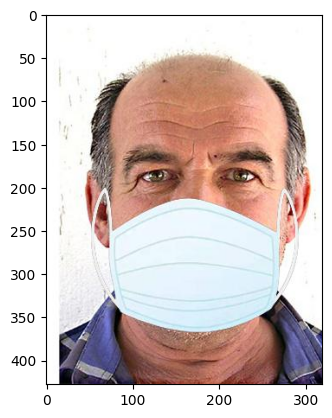

In [ ]:
# displaying with mask image
img = mpimg.imread('/content/facemask/data/with_mask/with_mask_955.jpg')
imgplot = plt.imshow(img)
plt.show()

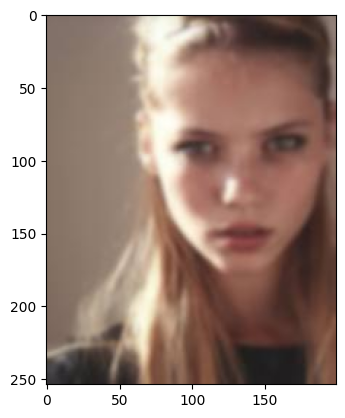

In [ ]:
# displaying without mask image
img = mpimg.imread('/content/facemask/data/without_mask/without_mask_1150.jpg')
imgplot = plt.imshow(img)
plt.show()

**Image Processing**

* Resize the Images

* Convert the images to numpy arrays

In [ ]:
import os
import numpy as np
from PIL import Image

# Define dataset paths
with_mask_path = '/content/facemask/data/with_mask'
without_mask_path = '/content/facemask/data/without_mask'

# Get list of image files
with_mask_files = os.listdir(with_mask_path)
without_mask_files = os.listdir(without_mask_path)

data = []  # List to store NumPy arrays

# Process images with mask
for img_file in with_mask_files:
    img_path = os.path.join(with_mask_path, img_file)  # Correct path
    if os.path.isfile(img_path):  # Ensure it's a valid file
        image = Image.open(img_path)
        image = image.resize((128, 128))
        image = image.convert('RGB')
        image = np.array(image)
        data.append(image)

# Process images without mask
for img_file in without_mask_files:
    img_path = os.path.join(without_mask_path, img_file)  # Correct path
    if os.path.isfile(img_path):  # Ensure it's a valid file
        image = Image.open(img_path)
        image = image.resize((128, 128))
        image = image.convert('RGB')
        image = np.array(image)
        data.append(image)

print(f"Processed {len(data)} images successfully!")


/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1045: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Processed 7553 images successfully!


In [ ]:
type(data)

list

In [ ]:
len(data)

7553

array([[[ 65, 110, 119],
        [ 66, 111, 120],
        [ 69, 113, 123],
        ...,
        [ 72, 119, 130],
        [ 63, 112, 127],
        [ 61, 110, 129]],

       [[ 72, 115, 124],
        [ 72, 115, 124],
        [ 77, 120, 128],
        ...,
        [ 70, 115, 130],
        [ 64, 112, 131],
        [ 63, 113, 133]],

       [[ 70, 109, 116],
        [ 78, 118, 124],
        [ 83, 126, 132],
        ...,
        [ 65, 114, 130],
        [ 65, 116, 135],
        [ 63, 115, 135]],

       ...,

       [[216, 126,  84],
        [200, 109,  71],
        [182,  91,  56],
        ...,
        [126,  46,  30],
        [119,  46,  29],
        [ 96,  41,  23]],

       [[205, 114,  82],
        [184,  93,  63],
        [175,  82,  55],
        ...,
        [120,  42,  23],
        [113,  44,  24],
        [101,  46,  26]],

       [[172,  80,  57],
        [162,  72,  52],
        [153,  61,  42],
        ...,
        [121,  44,  24],
        [108,  42,  21],
        [100,  43,  22]]], dtype=uint8)
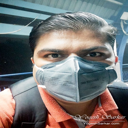

In [ ]:
data[0]

In [ ]:
type(data[0])

numpy.ndarray

In [ ]:
data[0].shape

(128, 128, 3)

Separate data and labels

In [ ]:
# converting image list and label list to numpy arrays

X = np.array(data)
Y = np.array(labels)

In [ ]:
print(X.shape)
print(Y.shape)

(7553, 128, 128, 3)
(7553,)


Train Test Split


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(7553, 128, 128, 3) (6042, 128, 128, 3) (1511, 128, 128, 3)


Scaling

In [ ]:
# scaling the data

X_train_scaled = X_train/255

X_test_scaled = X_test/255

In [ ]:
X_train_scaled[0]

array([[[0.37254902, 0.36470588, 0.37647059],
        [0.35686275, 0.34901961, 0.36078431],
        [0.32941176, 0.32156863, 0.33333333],
        ...,
        [0.50588235, 0.4745098 , 0.4627451 ],
        [0.53333333, 0.50588235, 0.49411765],
        [0.54117647, 0.50980392, 0.50196078]],

       [[0.35294118, 0.34509804, 0.35686275],
        [0.34117647, 0.33333333, 0.34509804],
        [0.3254902 , 0.31764706, 0.32941176],
        ...,
        [0.49411765, 0.45882353, 0.44705882],
        [0.51372549, 0.47843137, 0.46666667],
        [0.50980392, 0.47843137, 0.47058824]],

       [[0.35294118, 0.34509804, 0.35686275],
        [0.34117647, 0.33333333, 0.34509804],
        [0.3254902 , 0.31764706, 0.32941176],
        ...,
        [0.45882353, 0.41568627, 0.40784314],
        [0.47058824, 0.43137255, 0.42352941],
        [0.47058824, 0.43921569, 0.43137255]],

       ...,

       [[1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1

**Building a Convolutional Neural Networks (CNN)**

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, BatchNormalization, Dense, Dropout
num_of_classes = 2
model = Sequential([
    # Add convolutional layers
    Conv2D(32, (3, 3), activation='relu',  input_shape=(128,128,3)),
    MaxPooling2D(pool_size=(2, 2)),
    BatchNormalization(),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    BatchNormalization(),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    BatchNormalization(),

    # Flatten the output from the convolutional layers
    Flatten(),

    # Add dense layers
    Dense(512, activation='relu'),
    Dropout(rate=0.3),
    BatchNormalization(),

    Dense(256, activation='relu'),
    Dropout(rate=0.3),
    BatchNormalization(),

    Dense(128, activation='relu'),
    Dropout(rate=0.3),
    BatchNormalization(),

    Dense(64, activation='relu'),
    Dropout(rate=0.3),

    # Output layer for binary classification
    Dense(2, activation='sigmoid')
])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# compile the neural network
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

In [ ]:
# training the neural network
history = model.fit(X_train_scaled, Y_train, validation_split=0.1, epochs=5)

Epoch 1/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 25s 70ms/step - acc: 0.7989 - loss: 0.4416 - val_acc: 0.5190 - val_loss: 1.7277
Epoch 2/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - acc: 0.9024 - loss: 0.2410 - val_acc: 0.6860 - val_loss: 0.6506
Epoch 3/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - acc: 0.9391 - loss: 0.1640 - val_acc: 0.9504 - val_loss: 0.1584
Epoch 4/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - acc: 0.9549 - loss: 0.1286 - val_acc: 0.8430 - val_loss: 0.3501
Epoch 5/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - acc: 0.9525 - loss: 0.1228 - val_acc: 0.9488 - val_loss: 0.1389


Model Evaluation

In [ ]:
loss, accuracy = model.evaluate(X_test_scaled, Y_test)
print('Test Accuracy =', accuracy)

48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - acc: 0.9369 - loss: 0.1797
Test Accuracy = 0.93845134973526


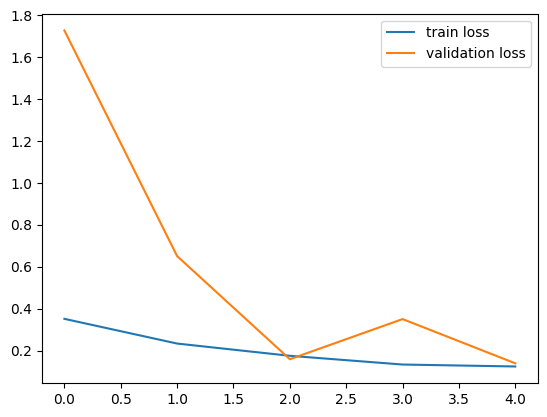

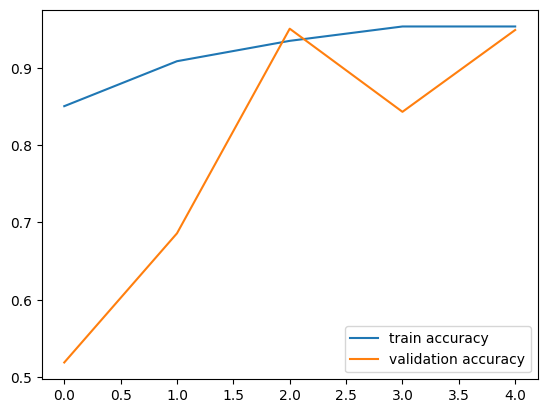

In [ ]:
h = history

# plot the loss value
plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

# plot the accuracy value
plt.plot(h.history['acc'], label='train accuracy')
plt.plot(h.history['val_acc'], label='validation accuracy')
plt.legend()
plt.show()

Predictive System

Path of the image to be predicted: /content/facemask/data/without_mask/without_mask_1153.jpg


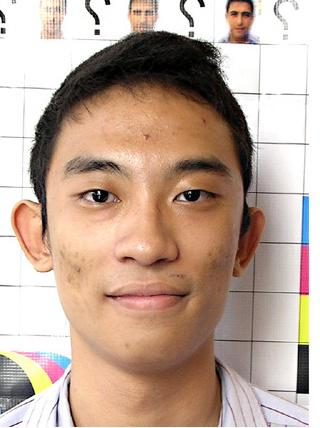

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
[[0.0168121 0.8439733]]
1
The person in the image is not wearing a mask


In [ ]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)


input_pred_label = np.argmax(input_prediction)

print(input_pred_label)


if input_pred_label == 0:

  print('The person in the image is wearing a mask')

else:

  print('The person in the image is not wearing a mask')